In [1]:
import warnings;
warnings.simplefilter('ignore')

### 1- Dependencies

In [4]:
import pandas as pd
from fbprophet import Prophet

### 2- Read in Data and Process Dates

In [9]:
df = pd.read_csv('C:/Users/faust/Desktop/Portfolio Projects/Barcode System/Grocery Store Data/CSV/sales_csv.csv',
                 encoding = 'ISO-8859-1')

In [10]:
df.head(10)

,Fecha,Product_ID,Código,Categoría,Producto,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto
0,25/06/2022,58,9.54456E+11,Carga,"Carga Virtual (Tipear TOTAL DE CARGA en: ""Mont...",1.0,400.0,400,1.0,440.0
1,25/06/2022,41,7.79811E+12,Aperitivo,Fernandito 1000ml,113.0,113.0,1,150.0,150.0
2,25/06/2022,108,77978141,Cigarrillo,Marlboro Fusión 10 10,190.0,190.0,1,250.0,250.0
3,25/06/2022,317,REPUESTODIBUJOBLANCO5,Librería,Repuesto Dibujo N°5 El Nene 1,23.0,184.0,8,30.0,240.0
4,25/06/2022,191,1.47852E+11,Fotocopia,IMPRESIÓN A4 1,0.0,0.0,8,20.0,160.0
5,25/06/2022,192,9.63259E+11,Fotocopia,IMPRESIÓN LEGAL 1,0.0,0.0,1,30.0,30.0
6,25/06/2022,187,1.53426E+11,Fotocopia,SIMPLE FAZ LEGAL / DOBLE FAZ A4 1,0.0,0.0,22,20.0,440.0
7,25/06/2022,311,7.79689E+12,Librería,Folio Oficio 1,23.0,23.0,1,30.0,30.0
8,25/06/2022,109,77947550,Cigarrillo,Marlboro Fusión 20 20,325.0,325.0,1,370.0,370.0
9,25/06/2022,451,7.79818E+12,Soda,Soda Vitalissima 2000ml,113.0,113.0,1,150.0,150.0


In [13]:
# Transforming Fecha (Date) into date format
df['Fecha'] = pd.to_datetime(df.Fecha, dayfirst=True)

In [21]:
df = df.groupby(['Fecha'],as_index=False)['Monto'].sum().sort_values(by='Fecha')
df.columns = ['ds', 'y']
df.head()

KeyError: 'Fecha'

### 3- Model Training

In [41]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


### 4- Forecasting

In [42]:
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-25,664.174080,7582.017964,19651.467787,664.174080,664.174080,12596.587562,12596.587562,12596.587562,10622.676983,10622.676983,10622.676983,1973.910579,1973.910579,1973.910579,0.0,0.0,0.0,13260.761642
1,2022-06-26,693.338093,7702.889829,20517.225661,693.338093,693.338093,13153.416368,13153.416368,13153.416368,10622.676983,10622.676983,10622.676983,2530.739385,2530.739385,2530.739385,0.0,0.0,0.0,13846.754461
2,2022-06-27,722.502106,2997.295861,15392.588536,722.502106,722.502106,8497.918699,8497.918699,8497.918699,10622.676983,10622.676983,10622.676983,-2124.758284,-2124.758284,-2124.758284,0.0,0.0,0.0,9220.420805
3,2022-06-28,751.666119,2450.845935,14319.215069,751.666119,751.666119,7460.539121,7460.539121,7460.539121,10622.676983,10622.676983,10622.676983,-3162.137862,-3162.137862,-3162.137862,0.0,0.0,0.0,8212.205240
4,2022-06-29,780.830132,4483.443509,17399.039309,780.830132,780.830132,10202.489502,10202.489502,10202.489502,10622.676983,10622.676983,10622.676983,-420.187481,-420.187481,-420.187481,0.0,0.0,0.0,10983.319634


In [43]:
forecast[['ds', 'yhat']].tail(25)

,ds,yhat
66,2022-08-30,10009.663671
67,2022-08-31,12779.800255
68,2022-09-01,11088.347338
69,2022-09-02,16598.620410
70,2022-09-03,15258.456926
71,2022-09-04,15843.471936
72,2022-09-05,11216.160470
73,2022-09-06,10206.967096
74,2022-09-07,12977.103680
75,2022-09-08,11285.650763


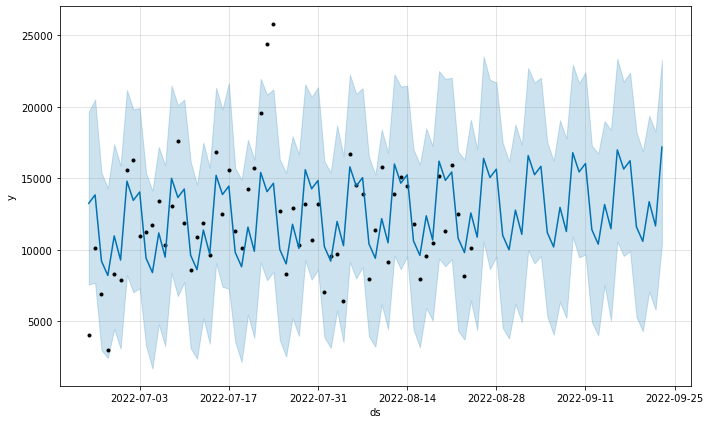

In [45]:
plotl_forecast = m.plot(forecast)

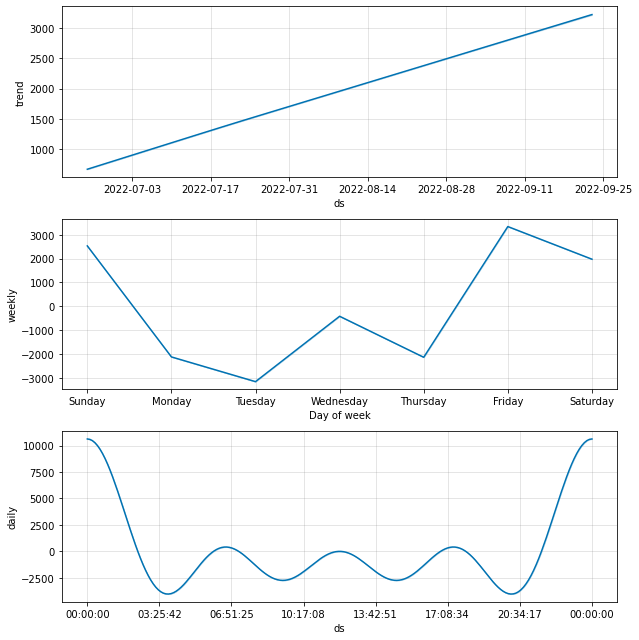

In [46]:
plotl_forecast_components = m.plot_components(forecast)